## Perspective on Computational Research 
## HW 03— Part 2
## Sanittawan Nikki Tan

### Part 2 - Design a visualization

Your assignment is to design a static visualization (i.e. a single image) that effectively communicates a data-driven story and provide a written explanation (approximately 500-750 words) describing your design. You should use any dataset you choose, making necessary transformations and summarizations as appropriate. The visualization should be interpretable without reference to your written explanation, so be sure to include all the necessary components (e.g. title, axis labels, legends).

In [1]:
import pandas as pd
import numpy as np
from string import capwords


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bmr = pd.read_csv('./data/bmr_democracy-v3.0.csv')

In [3]:
bmr['country'] = bmr['country'].apply(lambda x: capwords(x.strip().lower()))

In [4]:
bmr.columns

Index(['country', 'ccode', 'abbreviation', 'abbreviation_undp', 'year',
       'BMR_democracy', 'BMR_democracy_trans', 'BMR_democracy_breakdowns',
       'BMR_democracy_duration', 'democracy_omitteddata',
       'democracy_femalesuffrage'],
      dtype='object')

In [5]:
bmr['year'] = pd.to_datetime(bmr['year'], format='%Y').dt.year

### Number of democratic breakdowns

In [6]:
bmr_bd = bmr[bmr['year'] == 2015]

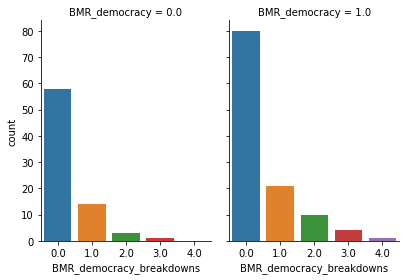

In [7]:
# This is just for exploratory purpose; Please do not grade.
g = sns.catplot(x="BMR_democracy_breakdowns", col="BMR_democracy",
                data=bmr_bd, kind="count",
                height=4, aspect=.7);

### Number of breakdowns and transitions to democracy

In [8]:
# check for NaNs
bmr['BMR_democracy_trans'].unique()

array([ 0.,  1., -1., nan])

In [9]:
filter1 = ['country', 'year', 'BMR_democracy_trans']
bmr_trans = bmr[filter1]

In [10]:
# drop NaNs
bmr_trans = bmr_trans.dropna()

In [11]:
bmr_trans['transition_occurs'] = 0

In [12]:
# set condition. If no transition occurs, the new column has the value of 0
condition = bmr_trans['BMR_democracy_trans'] == 0.0

In [13]:
# replace values
bmr_trans.loc[condition, 'transition_occurs'] = 0

In [14]:
# replace values
bmr_trans.loc[~condition, 'transition_occurs'] = 1

#### Result 1 - Total transitions (to democracy + democratic breakdowns)

In [15]:
total_trans = bmr_trans.groupby(['year'])['transition_occurs'].sum()

In [16]:
total_trans.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7, 10])

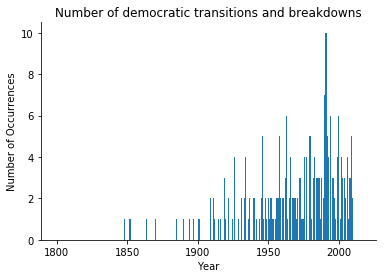

In [17]:
# Test plot; our final plot should look something like this
plt.bar(total_trans.index, total_trans.values)
plt.title('Number of democratic transitions and breakdowns')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
sns.despine();

#### Result 2 - Separating Number of Breakdowns and Number of Transitions to Democracy

In [18]:
dummies = pd.get_dummies(bmr_trans['BMR_democracy_trans'], prefix='trans_')

In [19]:
bmr_trans_final = pd.concat([bmr_trans, dummies], axis=1)

In [20]:
bmr_trans_final.head(3)

,country,year,BMR_democracy_trans,transition_occurs,trans__-1.0,trans__0.0,trans__1.0
0,United States Of America,1800,0.0,0,0,1,0
1,United States Of America,1801,0.0,0,0,1,0
2,United States Of America,1802,0.0,0,0,1,0


In [21]:
bmr_trans_final.rename(index=str, columns={"trans__-1.0": "num_breakdowns",
                               "trans__0.0":"num_nochange",
                               "trans__1.0": "num_todem"}, inplace=True)

In [22]:
bmr_trans_final.head(3)

,country,year,BMR_democracy_trans,transition_occurs,num_breakdowns,num_nochange,num_todem
0,United States Of America,1800,0.0,0,0,1,0
1,United States Of America,1801,0.0,0,0,1,0
2,United States Of America,1802,0.0,0,0,1,0


**Number of breakdowns per year**

In [23]:
num_breakdowns_year = bmr_trans_final.groupby(['year'])['num_breakdowns'].sum()

In [24]:
num_breakdowns_year.unique()

array([0, 1, 3, 2, 4], dtype=uint64)

**Number of transitions to democracy per year**

In [25]:
num_to_dem_year = bmr_trans_final.groupby(['year'])['num_todem'].sum()

In [26]:
num_to_dem_year.unique()

array([0, 1, 2, 3, 5, 4, 9], dtype=uint64)

**First attempt on the plot** (please do not grade this)

In [27]:
from matplotlib.ticker import AutoLocator
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FixedLocator

AxesSubplot(0.125,0.69125;0.775x0.18875)
AxesSubplot(0.125,0.408125;0.775x0.18875)
AxesSubplot(0.125,0.125;0.775x0.18875)


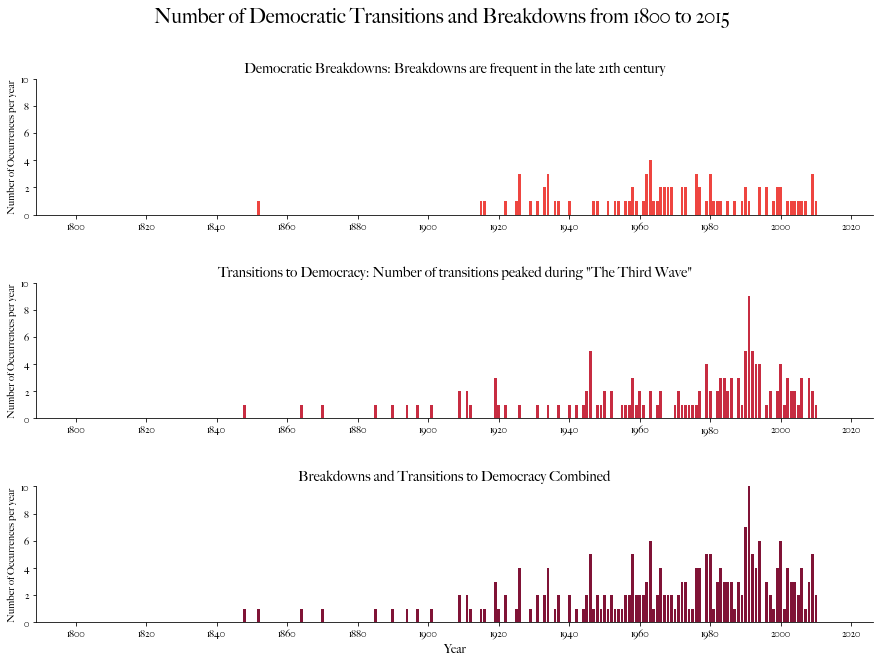

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Number of Democratic Transitions and Breakdowns from 1800 to 2015',
             fontsize=20, fontname='Big Caslon')

data_list = [num_breakdowns_year, num_to_dem_year, total_trans]
subtitles = ['Democratic Breakdowns: Breakdowns are frequent in the late 21th century',
             'Transitions to Democracy: Number of transitions peaked during "The Third Wave"',
             'Breakdowns and Transitions to Democracy Combined']
#colors = ['#87c0cd', '#226597', '#113f67']
colors = ['#ee4540', '#c72c41', '#801336'] 
i = 0

for ax, data, st, c in zip(axes.flatten(), data_list, subtitles, colors):
    i += 1
    print(ax)
    ax.set(ylim=(0, 10))
    ax.bar(data.index, data.values, color=c)
    ax.xaxis.set_major_locator(MaxNLocator(15))
    ax.set_title(st, fontname='Big Caslon', fontsize=14)
    if i == 3:
        ax.set_xlabel('Year', fontname='Big Caslon', fontsize=12)
    ax.set_ylabel('Number of Occurrences per year', fontname='Big Caslon', fontsize=10)
    sns.despine()
    
    for tick in ax.get_xticklabels():
        tick.set_fontname('Big Caslon')
    for tick in ax.get_yticklabels():
        tick.set_fontname('Big Caslon')

#plt.savefig('transitions.png', dpi=300, bbox_inches='tight')
plt.show()

### Plotting the final visualization (Please grade this plot)

AxesSubplot(0.125,0.69125;0.775x0.18875)
AxesSubplot(0.125,0.408125;0.775x0.18875)
AxesSubplot(0.125,0.125;0.775x0.18875)


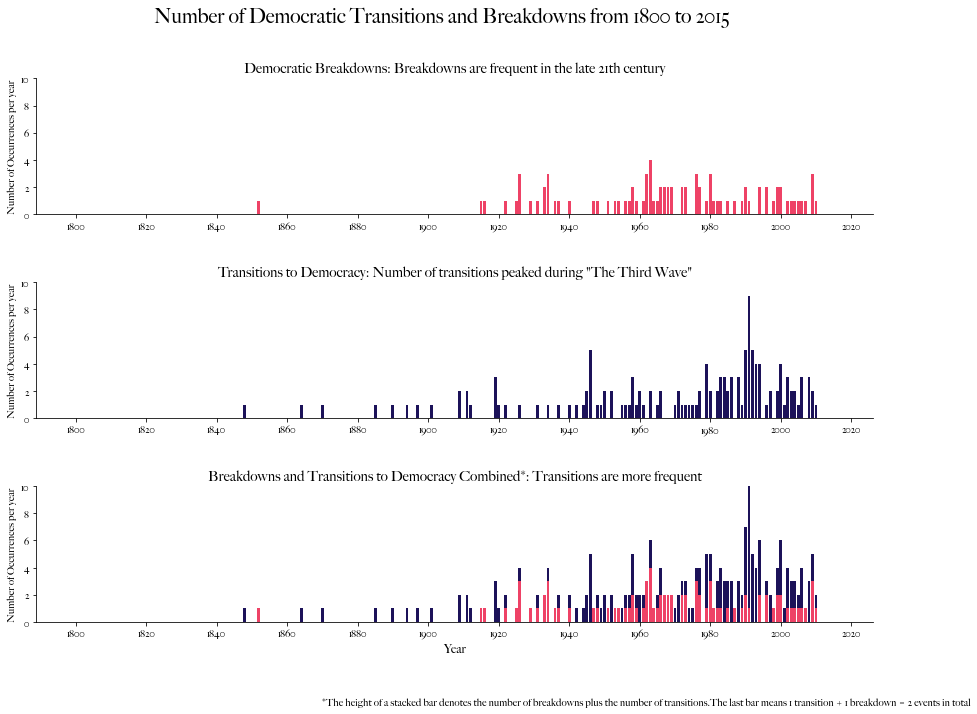

In [39]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Number of Democratic Transitions and Breakdowns from 1800 to 2015',
             fontsize=20, fontname='Big Caslon')

data_list = [num_breakdowns_year, num_to_dem_year, total_trans]
subtitles = ['Democratic Breakdowns: Breakdowns are frequent in the late 21th century',
             'Transitions to Democracy: Number of transitions peaked during "The Third Wave"',
             'Breakdowns and Transitions to Democracy Combined*: Transitions are more frequent']
#c_tup = ('#1c1259','#ee4266')
c_tup = ('#ee4266', '#1c1259')
#c_tup = ('#1cb3c8', '#3c415e')
colors = [c_tup[0], c_tup[1], c_tup]
i = 0

for ax, data, st, c in zip(axes.flatten(), data_list, subtitles, colors):
    i += 1
    print(ax)
    ax.set(ylim=(0, 10))
    if i == 3:    # make a stacked bar graph
        ax.set_xlabel('Year', fontname='Big Caslon', fontsize=12)
        ax.bar(data.index, num_breakdowns_year.values, color=c[0])
        ax.bar(data.index, num_to_dem_year.values, bottom=num_breakdowns_year.values, color=c[1])
    else:
        ax.bar(data.index, data.values, color=c)
    ax.xaxis.set_major_locator(MaxNLocator(15))
    ax.set_title(st, fontname='Big Caslon', fontsize=14)
    ax.set_ylabel('Number of Occurrences per year', fontname='Big Caslon', fontsize=10)

    sns.despine()
    
    for tick in ax.get_xticklabels():
        tick.set_fontname('Big Caslon')
    for tick in ax.get_yticklabels():
        tick.set_fontname('Big Caslon')

ftnt = ('*The height of a stacked bar denotes the number of breakdowns plus the number of transitions.'
       'The last bar means 1 transition + 1 breakdown = 2 events in total')
plt.figtext(0.99, 0.01, ftnt, horizontalalignment='right', fontfamily='Big Caslon')
plt.savefig('transitions.png', dpi=300, bbox_inches='tight')
plt.show()

In your written explanation, be sure to rigorously defend your design choices. This includes (but is not limited to):

* What is the story?
* Why did you select this graphical form?
* Why did you use each channel to encode the data (e.g. spatial position, size, color, scale)?
* How do these decisions facilitate effective communication?

[Is it truthful?
Is it functional?
Is it beautiful?
Is it insightful?
Is it enlightening?]

__Discussion__

As my primary research interest is on regime change, the story that I want to tell here is democratic transitions have yet to be stabilized. It is true that breakdowns and transitions frequently occur in the 20th century than in the 19th century, but they do not seem to disappear. What this plot does not capture is that by 1800, some countries are already a democracy and have not experienced breakdowns/transitions like the United States. However, the goal of this visualization is to underscore the fact that democratic breakdowns and transitions still occur, but most activities tend to be during the "Third Wave" of democracy as Huntington puts it. The chart may beg another question: how many countries are actually contributing to these activities? Unfortunately, we would need another chart to visualize that.

This visualization is based on a data set called Boix-Miller-Rosato (BMR) Dichotomous Coding of Democracy, Version 3.0 which hand-codes all regime types and transitions from 1800 to 2015 across 222 countries. I chose this data set because the coding scheme is very straightforward and does not require a lot of cleaning before visualizing. In order to obtain what kind of transition occurs in a distinct country-year, I select democracy_trans variable which encodes -1 as democratic breakdown, 0 as no change and 1 as transition (to democracy). I then made dummy variables of the 3 categories for calculating the number of breakdowns and transitions to democracy respectively. Next, I group the data by year and calculate the total number of breakdowns and transitions combined, the number of breakdowns and the number of transitions to democracy. Finally, I visualize the prepared data using a series of bar plots.

On bar plots, I chose them because I am plotting the number of occurrences of a political event across different years. I think that bar plot is associated with frequency (like distribution plots), so it should be straightforward to the audience to interpret. I decide to make a series of static plots because each of them tell a slightly different story. The first subplot is on the number of democratic breakdowns while the second one is on the number of transitions to democracy. The final subplot combines both information with the aim to illustrate the proportion of breakdowns and democratic transitions per year. Readers should walk away from this plot with the idea that transitions to democracy are much more ubiquitous than breakdowns. 

Normally, I refrain from using a stacked bar chart because it is sometimes confusing and hard to interpret. However, because the stacked plot is accompanied by the first two plots which separately illustrate each component of the stacked bar chart, it makes sense to use a stacked plot here. Without a stacked bar, the final plot would not have added much useful information (I made a non-stacked chart in my first iteration (as you can see) and my friend said it did not add much value. Per his suggestion, I made a stacked bar plot).

On color schemes, I intentionally use (almost) opposite colors to highlight the differences between each plot. The stacked bar graph is just a combination of the two above plots, so the same color scheme is repeated again. Different colors should alert readers that the two charts convey different information too.

On labels and scale, labels are carefully crafted. In Matplotlib, even for a figure with subplots, all x and y axis labels are normally repeated in each subplot. I reduced the y-axis label to be present only once at the bottom center to avoid clutter, but I decide to keep y-axis labels as they are for clarity. I purposefully did not add legends to indicate different colors (also to avoid clutter). I believe I have this luxury because the subplot titles in the above two plots and colors should aid the audience in interpreting the stacked bar chart. Although this piece of information is implied, I believe other components of the visualization justifies its implication. Regarding the x-axis tickers (year), I customize it to show 15 different years rather than the defaulted 5 years to increase granularity. Y axes of all plots start and end on the same scale, ranging from 0 to 10. Fonts are customized and standardized to make it look professional. The main title and subtitles are written to describe key insights of the graph rather than saying the obvious so that the readers do not have to refer to the write-up here.  

This chart should satisfy Cairo's truthfulness, functionality, beauty, and insight. However, readers may question whether it is enlightening. It is undeniable that the information I am presenting in this chart is fairly well-recognized (democracy is rather a modern regime; a lot of countries democratized between the 1980s and 1990s). Nevertheless, I have yet to see a good visualization of this insight. Scholars usually show a table full of numbers of countries that experienced democratic transitions and/or breakdowns. My rationale is to give this widely known fact a fresh look using what I learned in class. Some audience who are not familiar with regime change literature or this fact may find it enlightening or easy to remember with this plot. 


References:
1. http://jonathansoma.com/lede/data-studio/matplotlib/changing-fonts-in-matplotlib/
2. http://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/
3. https://medium.com/@rayheberer/generating-matplotlib-subplots-programmatically-cc234629b648
4. https://flynn.gg/blog/better-matplotlib-charts/